# Problem Statement

Airbnb Inc is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences. Airbnb has close to 150 million customers across the world. Price is the most important factor considered by the customer while making booking into a property. Strategic pricing of the properties is important to avoid losing customers to the competitors.  
  
We have a data of 74111 Airbnb properties across the nations. Based on this data build a simple and multiple linear regression model to predict the strategic pricing of a new listed property on Airbnb.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import matplotlib.style

### Importing data

In [ ]:
# reading the CSV file into pandas dataframe
df = pd.read_csv("AirBNB.csv")

C:\Users\sruth\AppData\Local\Temp\ipykernel_17452\1606136728.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("AirBNB.csv")


### EDA

In [ ]:
# Check top few records to get a feel of the data structure
df.head()

,id,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,6901257,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,6304928,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,7919400,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,13418779,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,3808709,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [ ]:
# drop the id column as it is useless for the model
df = df.drop('id', axis=1)

In [ ]:
df.head()

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
0,Entire home/apt,3.0,1.0,strict,True,f,100.0,1.0,1.0,5.010635
1,Entire home/apt,7.0,1.0,strict,True,t,93.0,3.0,3.0,5.129899
2,Entire home/apt,5.0,1.0,moderate,True,t,92.0,1.0,3.0,4.976734
3,Entire home/apt,4.0,1.0,flexible,True,f,NaN,2.0,2.0,6.620073
4,Entire home/apt,2.0,1.0,moderate,True,t,40.0,0.0,1.0,4.744932


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   room_type             74106 non-null  object 
 1   accommodates          74108 non-null  float64
 2   bathrooms             73908 non-null  float64
 3   cancellation_policy   74103 non-null  object 
 4   cleaning_fee          74107 non-null  object 
 5   instant_bookable      74111 non-null  object 
 6   review_scores_rating  57389 non-null  float64
 7   bedrooms              74019 non-null  float64
 8   beds                  73980 non-null  float64
 9   log_price             74111 non-null  float64
dtypes: float64(6), object(4)
memory usage: 5.7+ MB


In [ ]:
df.describe(include="all")

,room_type,accommodates,bathrooms,cancellation_policy,cleaning_fee,instant_bookable,review_scores_rating,bedrooms,beds,log_price
count,74106,74108.000000,73908.000000,74103,74107,74111,57389.000000,74019.000000,73980.000000,74111.000000
unique,3,NaN,NaN,3,2,2,NaN,NaN,NaN,NaN
top,Entire home/apt,NaN,NaN,strict,True,f,NaN,NaN,NaN,NaN
freq,41308,NaN,NaN,32500,54399,54660,NaN,NaN,NaN,NaN
mean,NaN,3.155125,1.235272,NaN,NaN,NaN,94.067365,1.265797,1.710868,4.782069
std,NaN,2.153603,0.582054,NaN,NaN,NaN,7.836556,0.852149,1.254142,0.717394
min,NaN,1.000000,0.000000,NaN,NaN,NaN,20.000000,0.000000,0.000000,0.000000
25%,NaN,2.000000,1.000000,NaN,NaN,NaN,92.000000,1.000000,1.000000,4.317488
50%,NaN,2.000000,1.000000,NaN,NaN,NaN,96.000000,1.000000,1.000000,4.709530
75%,NaN,4.000000,1.000000,NaN,NaN,NaN,100.000000,1.000000,2.000000,5.220356


### unique values for categorical variables

In [ ]:
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

ROOM_TYPE :  3
Shared room         2163
Private room       30635
Entire home/apt    41308
Name: room_type, dtype: int64


CANCELLATION_POLICY :  3
moderate    19060
flexible    22543
strict      32500
Name: cancellation_policy, dtype: int64


CLEANING_FEE :  2
False    19708
True     54399
Name: cleaning_fee, dtype: int64


INSTANT_BOOKABLE :  2
t    19451
f    54660
Name: instant_bookable, dtype: int64




### Converting Instant_bookable from 'f' and 't' to boolean

In [ ]:
df.instant_bookable.replace(['f','t'],[False,True],inplace=True )

### Converting categorical to dummy variables

In [ ]:
df.instant_bookable.astype("object")

0        False
1         True
2         True
3        False
4         True
         ...  
74106    False
74107    False
74108     True
74109     True
74110    False
Name: instant_bookable, Length: 74111, dtype: object

In [ ]:
df = pd.get_dummies(df, columns=['room_type','cancellation_policy','cleaning_fee','instant_bookable'],drop_first=True)

In [ ]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.0,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.0,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.0,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,NaN,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.0,0.0,1.0,4.744932,0,0,1,0,1,1


In [ ]:
# Are there any missing values ?
df.isnull().sum()

accommodates                        3
bathrooms                         203
review_scores_rating            16722
bedrooms                           92
beds                              131
log_price                           0
room_type_Private room              0
room_type_Shared room               0
cancellation_policy_moderate        0
cancellation_policy_strict          0
cleaning_fee_True                   0
instant_bookable_True               0
dtype: int64

### Imputing missing values

In [ ]:
for column in df.columns:
    if df[column].dtype != 'object':
        mean = df[column].mean()
        df[column] = df[column].fillna(mean)

df.isnull().sum()

accommodates                    0
bathrooms                       0
review_scores_rating            0
bedrooms                        0
beds                            0
log_price                       0
room_type_Private room          0
room_type_Shared room           0
cancellation_policy_moderate    0
cancellation_policy_strict      0
cleaning_fee_True               0
instant_bookable_True           0
dtype: int64

In [ ]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1,1


In [ ]:
df.describe()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,3.155125,1.235272,94.067365,1.265797,1.710868,4.782069,0.413366,0.029186,0.257182,0.438531,0.734021,0.262458
std,2.153559,0.581256,6.896002,0.851620,1.253033,0.717394,0.492441,0.168329,0.437083,0.496211,0.441856,0.439973
min,1.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,93.000000,1.000000,1.000000,4.317488,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,94.067365,1.000000,1.000000,4.709530,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,1.000000,99.000000,1.000000,2.000000,5.220356,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
max,16.000000,8.000000,100.000000,10.000000,18.000000,7.600402,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Checking for duplicates

In [ ]:
# Are there any duplicates ?
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))
#df[dups]

Number of duplicate rows = 19998


In [ ]:
print('Before',df.shape)
df.drop_duplicates(inplace=True)
print('After',df.shape)

Before (74111, 12)
After (54113, 12)


In [ ]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### Correlation Plot

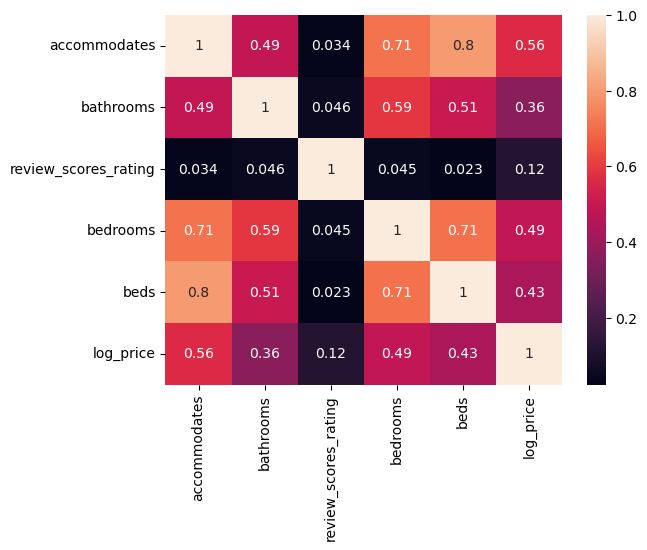

In [ ]:
sns.heatmap(df.iloc[:, 0:6].corr(),annot=True)
plt.show()

**The variable 'Accommodates', 'bedrooms','bathrooms', 'beds' are having correlation with each other.**


In [ ]:
df.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,log_price,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,5.010635,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,5.129899,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,4.976734,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,6.620073,0,0,0,0,1,0
4,2.0,1.0,40.000000,0.0,1.0,4.744932,0,0,1,0,1,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54113 entries, 0 to 74110
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   accommodates                  54113 non-null  float64
 1   bathrooms                     54113 non-null  float64
 2   review_scores_rating          54113 non-null  float64
 3   bedrooms                      54113 non-null  float64
 4   beds                          54113 non-null  float64
 5   log_price                     54113 non-null  float64
 6   room_type_Private room        54113 non-null  uint8  
 7   room_type_Shared room         54113 non-null  uint8  
 8   cancellation_policy_moderate  54113 non-null  uint8  
 9   cancellation_policy_strict    54113 non-null  uint8  
 10  cleaning_fee_True             54113 non-null  uint8  
 11  instant_bookable_True         54113 non-null  uint8  
dtypes: float64(6), uint8(6)
memory usage: 3.2 MB


### Outlier Checks

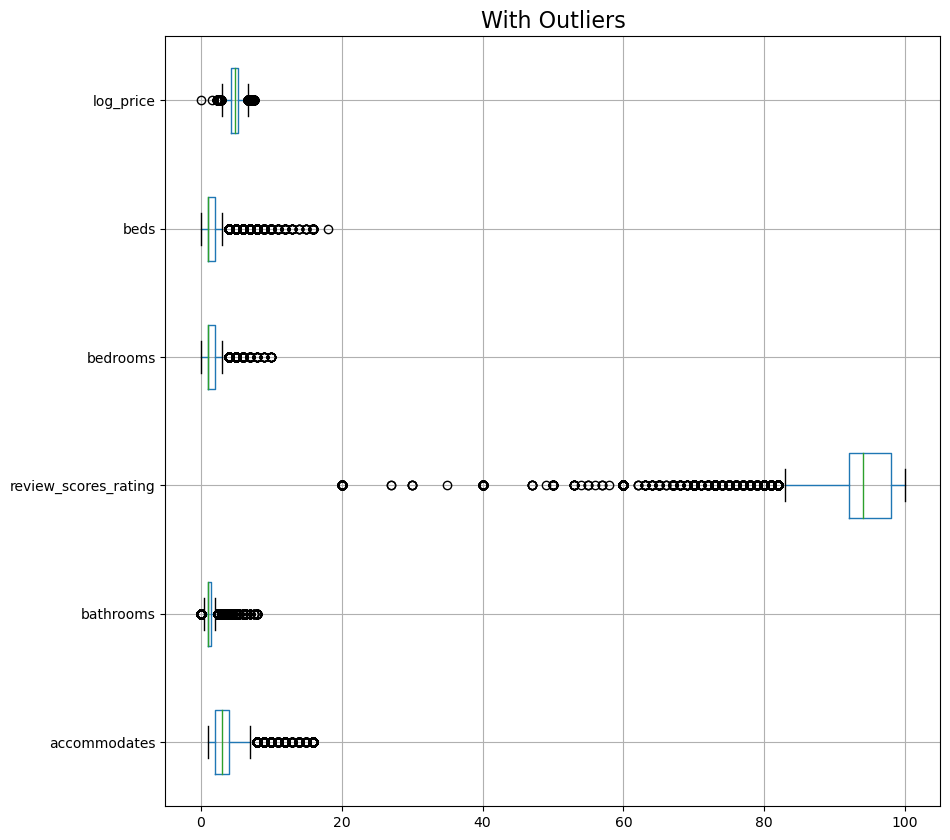

In [ ]:
# construct box plot for continuous variables
cont=df.dtypes[(df.dtypes!='uint8') & (df.dtypes!='bool')].index
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('With Outliers',fontsize=16)
plt.show()

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
for column in df[cont].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

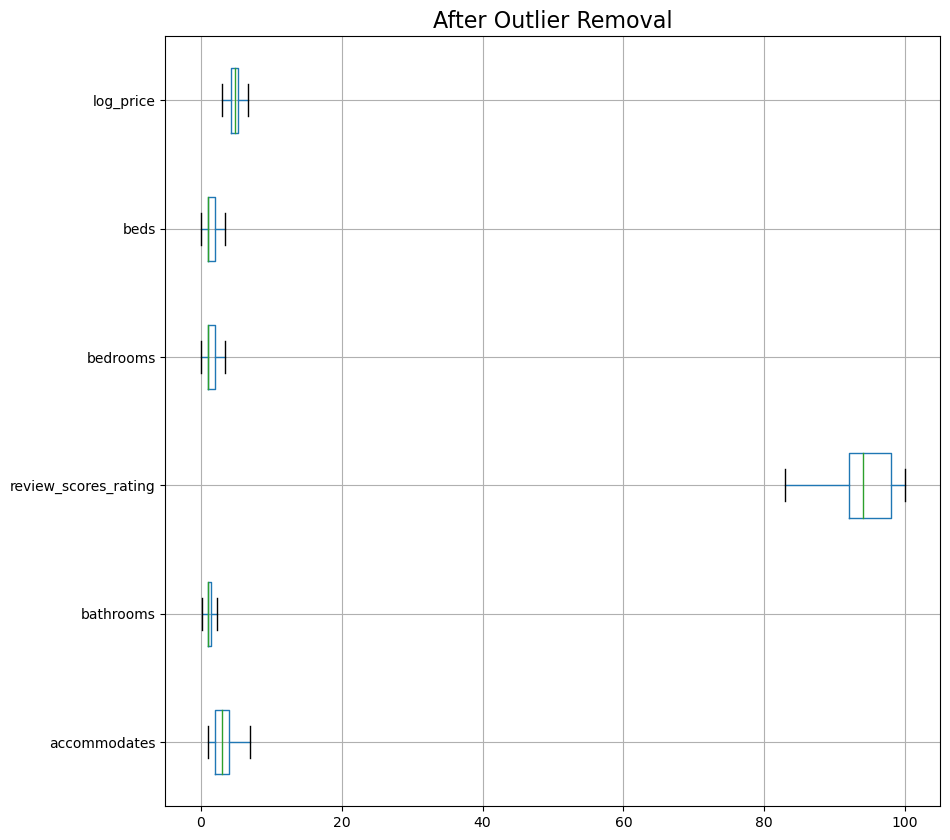

In [ ]:
plt.figure(figsize=(10,10))
df[cont].boxplot(vert=0)
plt.title('After Outlier Removal',fontsize=16)
plt.show()

### Data Distribution

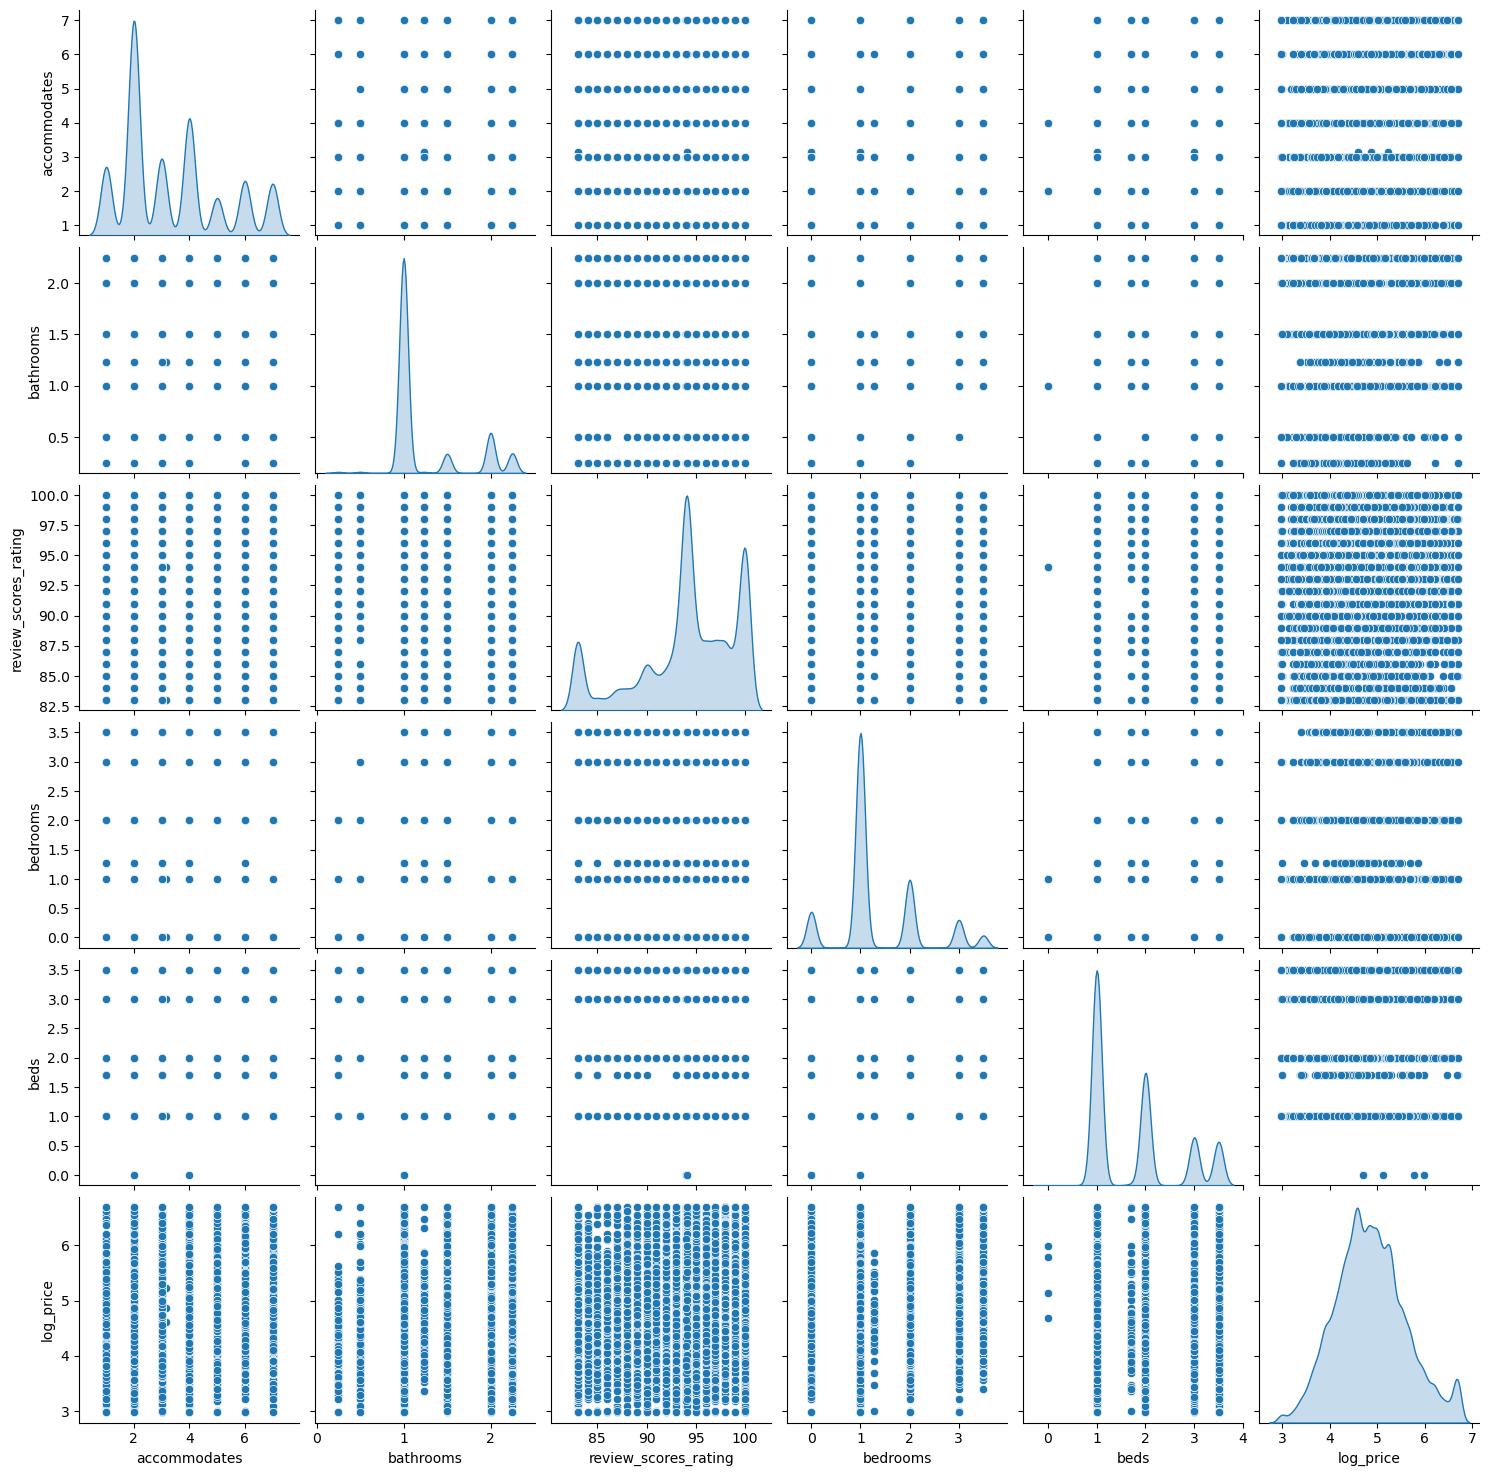

In [ ]:
df_attr = (df[cont])
sns.pairplot(df_attr, diag_kind='kde')
plt.show()

### Train-Test Split

In [ ]:
# Copy all the predictor variables into X dataframe
X = df.drop('log_price', axis=1)

# Copy target into the y dataframe.
y = df[['log_price']]

In [ ]:
X.head()

,accommodates,bathrooms,review_scores_rating,bedrooms,beds,room_type_Private room,room_type_Shared room,cancellation_policy_moderate,cancellation_policy_strict,cleaning_fee_True,instant_bookable_True
0,3.0,1.0,100.000000,1.0,1.0,0,0,0,1,1,0
1,7.0,1.0,93.000000,3.0,3.0,0,0,0,1,1,1
2,5.0,1.0,92.000000,1.0,3.0,0,0,1,0,1,1
3,4.0,1.0,94.067365,2.0,2.0,0,0,0,0,1,0
4,2.0,1.0,83.000000,0.0,1.0,0,0,1,0,1,1


In [ ]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1)

### Linear Regression Model

In [ ]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Let us explore the coefficients for each of the independent attributes

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for accommodates is 0.0950575053768653
The coefficient for bathrooms is 0.18080416863720788
The coefficient for review_scores_rating is 0.01170186939964442
The coefficient for bedrooms is 0.1580588143641493
The coefficient for beds is -0.045078994809700665
The coefficient for room_type_Private room is -0.6115570888488943
The coefficient for room_type_Shared room is -1.0818048891941543
The coefficient for cancellation_policy_moderate is -0.060015221396404105
The coefficient for cancellation_policy_strict is -0.005822870628088896
The coefficient for cleaning_fee_True is -0.08187381765071916
The coefficient for instant_bookable_True is -0.06503896431474503


In [ ]:
# Let us check the intercept for the model

intercept = regression_model.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 3.4292638017758583


In [ ]:
# R square on training data
regression_model.score(X_train, y_train)

0.5082917563299905

50% of the variation in the log_price is explained by the predictors in the model for train set

In [ ]:
# R square on testing data
regression_model.score(X_test, y_test)

0.5019765734338826

In [ ]:
#RMSE on Training data
predicted_train=regression_model.fit(X_train, y_train).predict(X_train)
np.sqrt(metrics.mean_squared_error(y_train,predicted_train))

0.5159255811569989

In [ ]:
#RMSE on Testing data
predicted_test=regression_model.fit(X_train, y_train).predict(X_test)
np.sqrt(metrics.mean_squared_error(y_test,predicted_test))

0.5197867614388492

### Linear Regression using statsmodels(OLS)

In [ ]:
import statsmodels.api as sm

In [ ]:
X_train=sm.add_constant(X_train)# This adds the constant term beta0 to the Simple Linear Regression.
X_test=sm.add_constant(X_test)

In [ ]:
model = sm.OLS(y_train,X_train).fit()
model

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.508
Model:                            OLS   Adj. R-squared:                  0.508
Method:                 Least Squares   F-statistic:                     3813.
Date:                Mon, 03 Apr 2023   Prob (F-statistic):               0.00
Time:                        10:25:42   Log-Likelihood:                -30728.
No. Observations:               40584   AIC:                         6.148e+04
Df Residuals:                   40572   BIC:                         6.158e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            3.4293      0.050     67.981      0.000       3.330       3.528
accommodates                     0.0951      0.003     33.288      0.000       0.089       0.101
bathrooms                        0.1808      0.007     25.690      0.000       0.167       0.195
review_scores_rating             0.0117      0.001     22.275      0.000       0.011       0.013
bedrooms                         0.1581      0.005     32.798      0.000       0.149       0.168
beds                            -0.0451      0.005     -8.599      0.000      -0.055      -0.035
room_type_Private room          -0.6116      0.007    -93.327      0.000      -0.624      -0.599
room_type_Shared room           -1.0818      0.015    -72.867      0.000      -1.111      -1.053
cancellation_policy_moderate    -0.0600      0.007     -8.318      0.000      -0.074      -0.046
cancellation_policy_strict      -0.0058      0.007     -0.887      0.375      -0.019       0.007
cleaning_fee_True               -0.0819      0.006    -12.945      0.000      -0.094      -0.069
instant_bookable_True           -0.0650      0.006    -11.560      0.000      -0.076      -0.054
==============================================================================
Omnibus:                     2618.685   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4228.792
Skew:                           0.519   Prob(JB):                         0.00
Kurtosis:                       4.192   Cond. No.                     1.86e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.86e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
#Calculate MSE on train
predicted_train=model.predict(X_train)
mse=metrics.mean_squared_error(y_train,predicted_train)


In [ ]:
np.sqrt(mse) #RMSE on train

0.5159255811569989

In [ ]:
# Prediction on Test data
y_pred = model.predict(X_test)

In [ ]:
#Calculate MSE on test
mse=metrics.mean_squared_error(y_test,y_pred)
np.sqrt(mse) #RMSE on test

0.5197867614388497

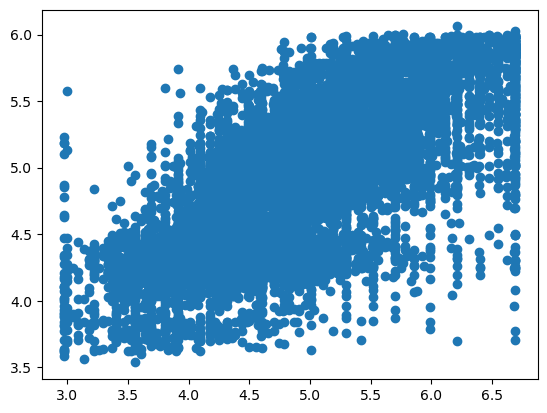

In [ ]:
plt.scatter(y_test, y_pred)
plt.show()

In [ ]:
for i,j in np.array(model.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3.43) * const + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_Private room + (-1.08) * room_type_Shared room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True + (-0.07) * instant_bookable_True + 

## Conclusion

##### The final Linear Regression equation is  
  
<b>log_price = b0 + b1 * instant_bookable_True + b2 * accommodates + b3 * bathrooms + b4 * review_scores_rating + b5 * bedrooms + b6 * beds + b7 * room_type_private_room + b8 * room_type_shared_room + b9 * cancellation_policy_moderate + b10 * cancellation_policy_strict + b11 * cleaning_fee_True </b>
  
<b>log_price = (3.43) * Intercept + (-0.07) * instant_bookable_True + (0.1) * accommodates + (0.18) * bathrooms + (0.01) * review_scores_rating + (0.16) * bedrooms + (-0.05) * beds + (-0.61) * room_type_private_room + (-1.08) * room_type_shared_room + (-0.06) * cancellation_policy_moderate + (-0.01) * cancellation_policy_strict + (-0.08) * cleaning_fee_True</b>  
  
When accommodates increases by 1 unit, log_price increases by 0.1 units, keeping all other predictors constant
,When no. of bathrooms increases by 1 unit, log_price increases by 0.18 units, keeping all other predictors constant
,etcc....


  
There are also some negative co-efficient values, for instance, room_type_shared_room has its corresponding co-efficient as -1.08. This implies, when the room type is shared room, the log_price decreases by 1.08 units, keeping all other predictors constant. etc..



## Insights

#####
1) There is a Decrement in Price of the property by a larger factor if the rooms are Shared rather than Private .

2) There is a Decrement in Price of the property by a larger factor if the property has a Strict Cancellation Policy
   rather than a Moderate Cancellation Policy.
   
3) More the number of bedrooms/bathrooms the price of the property goes up a little

4) while More the number of beds the price of the property goes down a little .